In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [34]:
def gini(x):
    diff = np.abs(np.subtract.outer(x, x)).mean()
    rmad = diff/np.mean(x)
    g = 0.5 * rmad
    return g

In [2]:
df_list= pd.read_csv('/mnt/mass_drive/Dropbox/Dropbox/Momolbox/code/libro/cap_concentrazione/listings.csv')[['id','host_id','price']]
df_revs= pd.read_csv('/mnt/mass_drive/Dropbox/Dropbox/Momolbox/code/libro/cap_concentrazione/reviews.csv')

In [3]:
df_list.columns

Index(['id', 'host_id', 'price'], dtype='object')

In [4]:
df_revs.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [6]:
df = pd.merge(df_list,df_revs,  left_on='id',right_on='listing_id')

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].dt.year

In [39]:
results=[]

for year, df_year in df.groupby('year'): 
    res={'year':year}
    
    listings_host = df_year['host_id'].value_counts().to_numpy()
    
     
    res['gini'] = gini(listings_host)
    
    results.append(res)
    

    

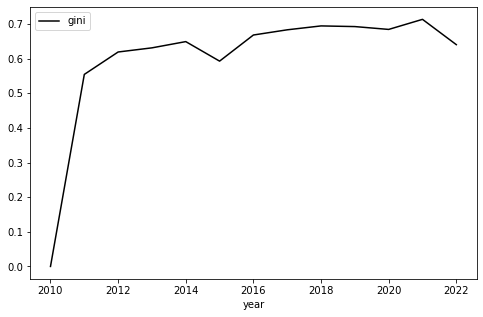

In [50]:
gini_df = pd.DataFrame(results).set_index('year').plot(color='black', figsize=(8,5))



In [55]:
results=[]

for year, df_year in df.groupby('year'): 
    res={'year':year}
    
    df_year['price'] = df_year['price'].str.replace(',', '') 
    df_year['price'] = df_year['price'].str.replace('$', '') 
    df_year['price'] = pd.to_numeric(df_year['price'])
    
    
    gini_pivot = pd.pivot_table(df_year, index ='host_id', values='price',aggfunc='sum')
    
    
    
     
    res['gini'] = gini(gini_pivot.price.tolist())
    
    results.append(res)
    


<ipython-input-55-65bd0290a1cd>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_year['price'] = df_year['price'].str.replace('$', '')
<ipython-input-55-65bd0290a1cd>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_year['price'] = df_year['price'].str.replace('$', '')
<ipython-input-55-65bd0290a1cd>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_year['price'] = df_year['price'].str.replace('$', '')
<ipython-input-55-65bd0290a1cd>:7: FutureWarning: The default value of regex will change from True to False in a

<AxesSubplot:xlabel='year'>

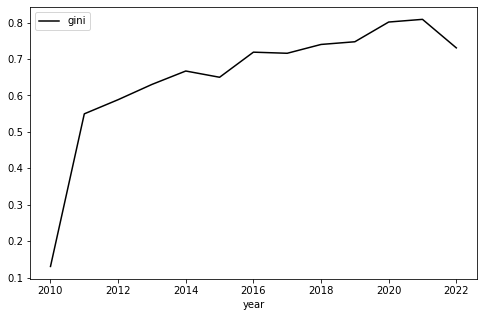

In [56]:
pd.DataFrame(results).set_index('year').plot(color='black', figsize=(8,5))


In [62]:
results=[]

for year, df_year in df.groupby('year'): 
    res={'year':year}
    

    gini_pivot = pd.pivot_table(df_year, index ='host_id', values='listing_id',aggfunc=len)
    
    
    
     
    res['gini'] = gini(gini_pivot.listing_id.tolist())
    
    results.append(res)

<AxesSubplot:xlabel='year'>

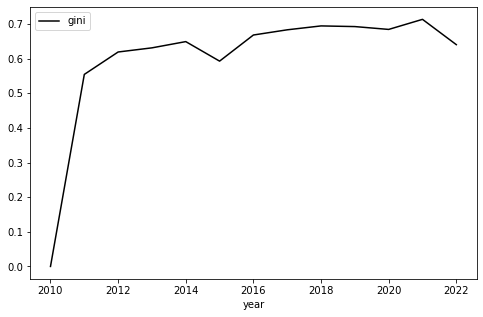

In [64]:
pd.DataFrame(results).set_index('year').plot(color='black', figsize=(8,5))

In [28]:
A

array([0.63696169, 0.26978671, 0.04097352, 0.01652764, 0.81327024,
       0.91275558, 0.60663578, 0.72949656, 0.54362499, 0.93507242,
       0.81585355, 0.0027385 , 0.85740428, 0.03358558, 0.72965545,
       0.17565562, 0.86317892, 0.54146122, 0.29971189, 0.42268722,
       0.02831967, 0.12428328, 0.67062441, 0.64718951, 0.61538511,
       0.38367755, 0.99720994, 0.98083534, 0.68554198, 0.65045928,
       0.68844673, 0.38892142, 0.13509651, 0.72148834, 0.52535432,
       0.31024188, 0.48583536, 0.88948783, 0.93404352, 0.3577952 ,
       0.57152983, 0.32186939, 0.59430003, 0.33791123, 0.391619  ,
       0.89027435, 0.22715759, 0.62318714, 0.08401534, 0.83264415,
       0.78709831, 0.23936944, 0.87648423, 0.05856803, 0.33611706,
       0.15027947, 0.45033937, 0.79632427, 0.23064221, 0.0520213 ,
       0.40455184, 0.19851304, 0.09075305, 0.58033239, 0.29869613,
       0.67199488, 0.19951544, 0.94211311, 0.36511017, 0.10549528,
       0.62910815, 0.92715455, 0.44037715, 0.95459049, 0.49989